In [1]:
import sys

sys.path.append("../")

In [6]:
import torch
import wandb
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from src.data_loading.load_data import load_data
from src.models.model import NeuralNetwork, CNN, NeuralNetworkMoreLayers
from src.models.train_eval_model import train, test, predict

In [3]:
wandb.init(project="test")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: polukhin-vo (polukhin). Use `wandb login --relogin` to force relogin


In [4]:
train_data = load_data(train=True)
train_loader = DataLoader(train_data, batch_size=64)

test_data = load_data(train=False)
test_loader = DataLoader(test_data, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
X, y = train_data[0]

In [6]:
model = NeuralNetwork()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))
loss_function = nn.CrossEntropyLoss()

for epoch in range(10):
    print(f"Эпоха номер {epoch + 1}")
    train(model, train_loader, optimizer, loss_function)
    accuracy, avg_loss = test(model, test_loader, loss_function)

    wandb.log({f"avg_loss": avg_loss})
    wandb.log({f"accuracy": accuracy})

Эпоха номер 1


100%|██████████| 157/157 [00:01<00:00, 146.76it/s]


Эпоха номер 2


100%|██████████| 157/157 [00:01<00:00, 150.75it/s]


Эпоха номер 3


100%|██████████| 157/157 [00:01<00:00, 152.56it/s]


Эпоха номер 4


100%|██████████| 157/157 [00:01<00:00, 156.53it/s]


Эпоха номер 5


100%|██████████| 157/157 [00:01<00:00, 152.56it/s]


Эпоха номер 6


100%|██████████| 157/157 [00:01<00:00, 145.96it/s]


Эпоха номер 7


100%|██████████| 157/157 [00:01<00:00, 151.21it/s]


Эпоха номер 8


100%|██████████| 157/157 [00:01<00:00, 145.93it/s]


Эпоха номер 9


100%|██████████| 157/157 [00:01<00:00, 149.57it/s]


Эпоха номер 10


100%|██████████| 157/157 [00:01<00:00, 147.88it/s]


In [8]:
torch.save(model.state_dict(), "../models/first_version.pth")
wandb.log_artifact("../models/first_version.pth")

<Artifact run-g1zvsxca-first_version.pth>

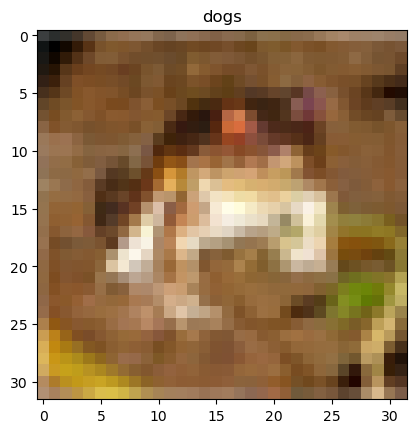

In [13]:
predict(model, X)

In [7]:
model = NeuralNetworkMoreLayers()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))
loss_function = nn.CrossEntropyLoss()

for epoch in range(10):
    print(f"Эпоха номер {epoch + 1}")
    train(model, train_loader, optimizer, loss_function)
    accuracy, avg_loss = test(model, test_loader, loss_function)

    wandb.log({f"avg_loss": avg_loss})
    wandb.log({f"accuracy": accuracy})

Эпоха номер 1


100%|██████████| 157/157 [00:01<00:00, 106.17it/s]


Эпоха номер 2


100%|██████████| 157/157 [00:01<00:00, 112.41it/s]


Эпоха номер 3


100%|██████████| 157/157 [00:01<00:00, 113.73it/s]


Эпоха номер 4


100%|██████████| 157/157 [00:01<00:00, 109.99it/s]


Эпоха номер 5


100%|██████████| 157/157 [00:01<00:00, 114.60it/s]


Эпоха номер 6


100%|██████████| 157/157 [00:01<00:00, 102.01it/s]


Эпоха номер 7


100%|██████████| 157/157 [00:01<00:00, 111.37it/s]


Эпоха номер 8


100%|██████████| 157/157 [00:01<00:00, 113.89it/s]


Эпоха номер 9


100%|██████████| 157/157 [00:01<00:00, 114.76it/s]


Эпоха номер 10


100%|██████████| 157/157 [00:01<00:00, 111.73it/s]


In [9]:
torch.save(model.state_dict(), "../models/second_version.pth")
wandb.log_artifact("../models/second_version.pth")

<Artifact run-abbfvg7m-second_version.pth>

In [9]:
wandb.init(project="test")

accuracy,▁▄▆▇█████▇
avg_loss,█▅▃▂▂▁▁▁▁▂
accuracy,0.475
avg_loss,1.496


In [7]:
model = CNN()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))
loss_function = nn.CrossEntropyLoss()

for epoch in range(5):
    print(f"Эпоха номер {epoch + 1}")
    train(model, train_loader, optimizer, loss_function)
    accuracy, avg_loss = test(model, test_loader, loss_function)

    wandb.log({f"avg_loss": avg_loss})
    wandb.log({f"accuracy": accuracy})

Эпоха номер 1


100%|██████████| 157/157 [00:03<00:00, 40.14it/s]


Эпоха номер 2


100%|██████████| 157/157 [00:03<00:00, 39.90it/s]


Эпоха номер 3


100%|██████████| 157/157 [00:03<00:00, 39.30it/s]


Эпоха номер 4


100%|██████████| 157/157 [00:04<00:00, 35.61it/s]


Эпоха номер 5


100%|██████████| 157/157 [00:04<00:00, 34.86it/s]


In [8]:
torch.save(model.state_dict(), "../models/CNN_version.pth")
wandb.log_artifact("../models/CNN_version.pth")

<Artifact run-z2iw2ppy-CNN_version.pth>

In [10]:
wandb.finish()

accuracy,▁▄▅▆▇█████
avg_loss,█▅▃▂▂▁▁▁▂▂
accuracy,0.458
avg_loss,1.576
